# KNN（K-近邻）算法在良/恶性中的预测应用

## 一、实验简介

### （一）问题描述
乳腺癌是女性最容易患的恶性肿瘤之一，同时也是世界范围内女性死亡的主要原因之一。而在我国，其发病率以每年3%的递增速度发展，且有日益增长之势，其死亡率增幅已达到38.9%。更令人担忧的是发病年龄也呈现出年轻化的趋势，形势非常严峻 。

乳腺肿瘤良恶性的准确诊断是其治疗中最重要的步骤。乳腺癌能否治愈，关键在于发现的时期，早期诊断和早期治疗是有可能痊愈的。现在医院的医生需要根据乳腺肿瘤中细胞核的半径、文理、平滑程度等特征来做出诊断，此项工作既费精力，又非常耗时，还需要防止误诊和漏诊，做起来是非常困难的。   

为了辅助医生做出正确的诊断，可以根据乳腺肿瘤检测数据和专家经验，利用机器学习算法开发一套自动分析诊断程序，机器学习算法的加入将大大提高乳腺肿瘤的检测效率和准确率。
 
 本实验借助威斯康辛州的乳腺肿瘤诊断的历史数据集，运用Sklearn机器学习库中的K近邻分类（KNN）算法对该州的诊断数据集进行学习，并对新的检测数据进行乳腺肿瘤良恶性判断。

### （二）问题需求

本实验中的数据集包含569个样本数据，每个样本包含32个属性（特征），其中，id表示样本的编号；diagnosis表示诊断结果(M代表恶性，B代表良性)，实验中用于KNN算法的标签。其他30个特征分为3组，每组分别代表由乳腺肿块的细针穿刺（FNA）的数字化图像计算出来的10个特征的均值、标准差和最差值。这10个特征的详细情况如下：  

|特征名|特征含义|
|---|---|
|radius|半径|
|texture|纹理（灰度值的标准差）|
|perimeter|周长|
|area|面积|
|smoothness|平滑程度（半径内的局部变化）|
|compactness|紧密度（周长 * 周长/面积-1.0)|
|concavity|凹度（轮廓凹部的严重程度）|
|concave points|凹缝（轮廓的凹部分）|
|symmetry|对称性|
|fractal dimension|分形维数|

本实验数据集中的样本有357个良性样本，212个恶性样本。样本特征数据的类型为数值型，保留了4位有效数字，特征属性中没有缺失值。 

实验中，将数据集按8:2的比例分成训练集和测试集。

数据文件所在的位置“KNN\data\data.csv”。

本实验将使用乳腺肿瘤数据训练集来训练KNN模型，并使用测试集在训练得到的模型上进行验证，得到模型的准确率或者召回率等评价指标。

## 二、 实验任务

本实验利用Sklearn库中的KNN模块，通过将569个样本中的80%作为训练集对KNN模型进行训练，并用训练后的模型对其余20%的样本进行分类预测。

具体的实验任务如下：

1.观察数据集：加载数据集，观察数据集的分布情况，看是否有缺失值。

2.数据可视化：对三组特征分别画出热力图，得到特征之间的相关性图。通过观察特征与特征之间的相关性，去除相关性高的特征，只取其中一个为代表，把选择的特征作为模型的输入特征，从而达到减少特征个数、提高模型准确率、减少运行时间的目的。

3.数据预处理：若数据中有缺失值，实验中需要对缺失值进行处理；由于KNN模型中使用标签数据的类型为数值型，需要将标签的类型进行改变；为减少计算量，需要对特征数据进行标准化。

4.数据集的划分：实验中需要将数据集按8:2的比例划分成训练集和测试集。

5.模型训练：需要实现KNN模型，再使用训练集对模型进行训练。

6.模型的评估：需要用测试集评估模型分类结果的准确率。

## 三、实验步骤

### （一）加载相关的包
1.加载numpy、pandas等包做数据处理。

2.加载matplotlib、seaborn包做数据可视化。

3.从sklearn.neighbors加载KNeighborsClassifier算法函数。

4.从sklearn.model_selection中加载train_test_split训练集-测试集划分的函数。

5.从sklearn.metrics中加载accuracy_score评估函数。

In [4]:
import numpy as np  # 数据处理包
import pandas as pd  # 文件读取包
import seaborn as sns  # 数据可视化包
import matplotlib.pyplot as plt  # 数据可视化包
from sklearn.neighbors import KNeighborsClassifier  # KNN分类模型
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.model_selection import train_test_split  # 数据划分函数
from sklearn.metrics import accuracy_score  # 评分指标，准确率

### （二）数据集的加载

利用Pandas中的read_csv()方法来读取csv格式的数据文件。

In [5]:
train = pd.read_csv("data/data.csv")#加载数据文件,注意加载数据文件的方式

利用Pandas中的head()函数来查看整个dataframe中的前五行数据，观察数据的整体特征，对读入的数据有一个大致的了解。

In [6]:
train.head()#观察数据的前五行

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### （三）数据处理

**（1）处理缺失值**

利用pandas.isnull().sum()查看是否存在缺失值。

isnull()函数返回的是布尔型的矩阵，特征中的数据如为缺失值，则该处的值是True；否则，该处的值是False。再通过sum()函数对缺失值数量进行统计。

In [7]:
train.isnull().sum()#缺失值的判断

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

由于id这一列并不是特征属性，而是数据集的一个样本编号，在数据处理时需要删除，删除此列的操作可以利用dorp()函数实现。 

diagnosis这一列是字符串类型的数据，实验中用作标签，由于KNN模型中需要使用数值型的标签数据，在数据处理时需将其转换成0和1，可以调用replace()函数实现。

drop()和replace()函数的参数解释如下：

drop()函数所使用的参数解释：

    labels：需要删除的列名；
    axis：设置删除的维度（axis=0对应shape的用第0个元素对应的维度，axis=1对应shape的用第1个元素对应的维度，以此类推）；
    inplace：是否替换原来的内容，默认为False。
  
replace()函数所使用的参数解释：
    
    to_replace:查找要替换的值；
    inplace:是否替换原来的内容，默认为False。

In [8]:
# 删除数据集的样本编号列
train = train.drop('id',axis = 1)

# 进行标签值替换，把标签里的M，B转换为1和0。
train.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

利用Pandas中的describe()函数来查看数据集的描述性统计数据。

In [9]:
train.describe()#数据集的统计数据

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**（2）数据可视化**

实验中的数据集已经将30个特征字段分成三组字段，在下划线后分别用mean（平均值）、se（标准差）和worst（最差值）来代表每组字段不同的度量方式。

为了减少数据的计算量可以进行特征选择，特征选择的目的是降维，用少量的特征代表样本的特性，这样也可以增强分类器的泛化能力，避免模型过拟合。在进行特征的选择时，可以对数据集的特征画出其热力图来观察特征与特征之间的相关性。

画热力图时，首先利用plt.figure(figsize=(12，10))函数创建一张画布（图形实例），然后利用plt.title()设置图像的标题，再利用sns.heatmap(data,cmap,annot,linewidths)函数绘画出三组特征的热力图，以便直观的观察特征之间的关系。

plt.figure()和sns.heatmap()函数的解释如下：

plt.figure()函数所使用的参数解释：

    figsize：设置画布的大小，其中12代表画布的长度，10代表画布的高度。


sns.heatmap()函数所使用的参数解释：
    
    data：数组形式的数据集；
    cmap：Matplotlib颜色图名、对象或颜色列表；
    annot：是否在每个单元格中填入数据值（True或False）；
    linewidths：将划分每个单元格的宽度。  

In [10]:
# 数据集中已经按照特征的位置关系分成3组，0列是标签，1~10列是mean组特征，11~20列是se组特征，21~30列是worst组特征。
features_mean= list(train.columns[1:11])
features_se= list(train.columns[11:21])
features_worst=list(train.columns[21:31])

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

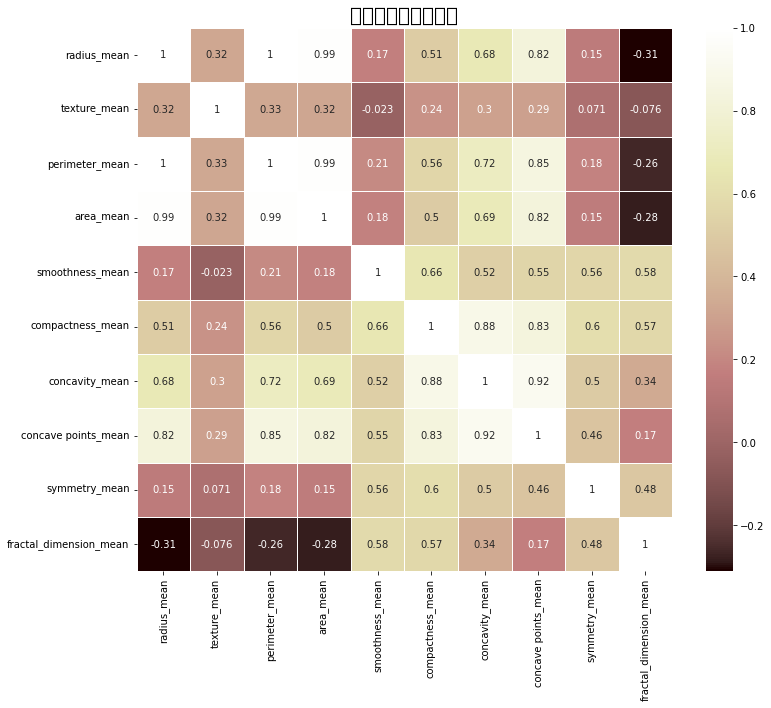

In [11]:
plt.rcParams['font.family'] = 'SimHei'# 设置字体序列为简黑，解决plt中中文显示问题。
#绘出mean组的热力图
plt.figure(figsize = (12,10))#设置画布
sns.heatmap(train[features_mean].corr(), cmap = 'pink', annot = True, linewidths = 0.5)#用来观察特征之间的相关性
plt.title('平均值相关性热点图', fontsize = 20)#设置图标题
plt.show()

/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173})

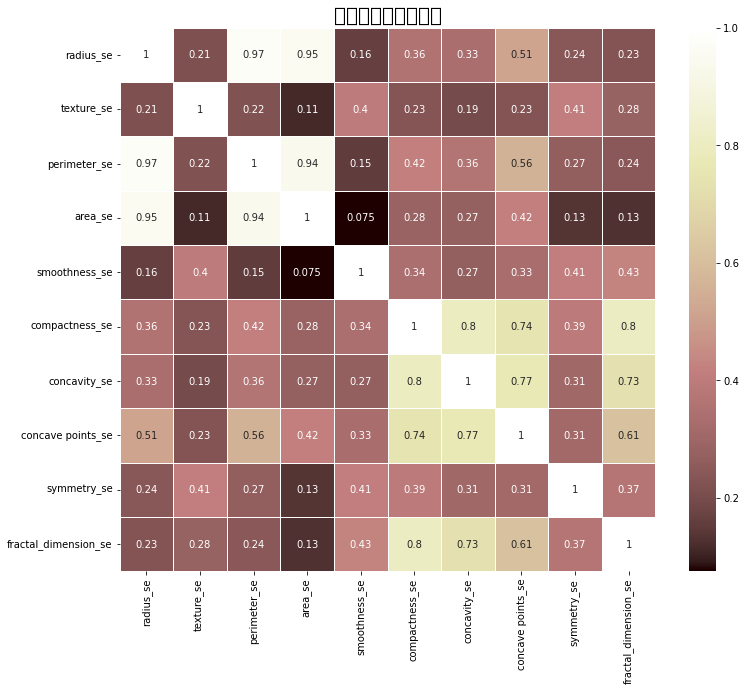

In [12]:
#绘出se组的热力图
plt.figure(figsize = (12,10))
sns.heatmap(train[features_se].corr(), cmap = 'pink', annot = True, linewidths = 0.5)
plt.title('标准差相关性热点图', fontsize = 20)
plt.show()

/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173})

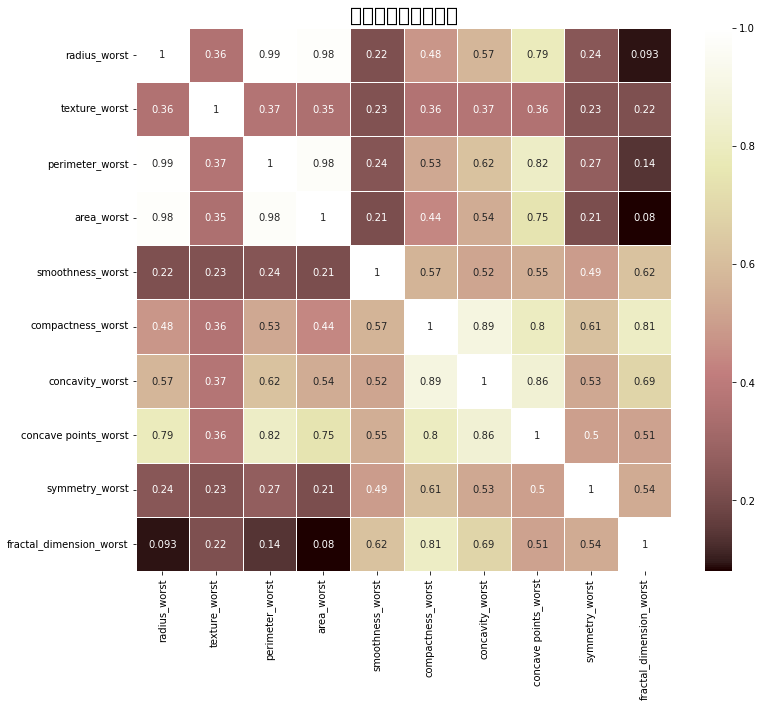

In [13]:
#绘出worst组的热力图
plt.figure(figsize = (12,10))
sns.heatmap(train[features_worst].corr(), cmap = 'pink', annot = True, linewidths = 0.5)
plt.title('最差值相关性热点图', fontsize = 20)
plt.show()

通过观察上面的热力图，可以很容易地发现哪些特征彼此之间有很高的关联，哪些特征之间的关联性较低。两特征之间相关性越高，颜色越浅，值越接近于1；反之相关性越低，所对应的颜色越深，值越接近于0。

通过观察第一幅热力图，radius_mean、perimeter_mean、area_mean这三个属性相互之间的相关性非常高，而compactness_mean、concavity_mean、concave points_mean这三个属性相互之间的相关性也很高。因此在这几个属性里选取radius_mean、compactness_mean作为代表，删除其余属性。

同样观察第二幅热力图，radius_se、perimeter_se、area_se这三个属性相互之间相关性高，concavity_se与compactness_se之间相关性高，因此在这5个属性里选取radius_se、concavity_se作为代表，删除其余属性。

观察第三幅热力图，radius_worst、perimeter_worst、area_worst这三个属性相互之间相关性高，compactness_worst、concavity_worst、concave points_worst这三个属性相互之间相关性也很高，因此在这几个属性里选取radius_worst、compactness_worst作为代表，删除其余属性。

进行上述特征选择后，在原有的30个特征中只选择了19个特征。

In [14]:
#  选择需要去除的相关性强的特征，使用pandas.drop()去除
feature_clear = ['perimeter_mean','area_mean','concavity_mean','concave points_mean',
                'perimeter_se','area_se','concavity_se',
                'perimeter_worst','area_worst','concavity_worst','concave points_worst']
train.drop(feature_clear,axis=1,inplace=True)# 删除特征

本实验中，由于diagnosis为标签列，所以需要把它单独取出来。采用Pandas中取某一列的方法取出标签列数据。

In [15]:
y = train["diagnosis"]#获取标签列

取了标签列数据后需要将此列删除，采用Pandas下的drop(列名，axis=1指定为列，inplace=是否替换原来的内容)函数删除标签列数据。

In [16]:
X = train.drop(['diagnosis'],axis=1)# 删除标签列

**（3）数据标准化**

因为数据标准化可以降低计算量，同时不会影响KNN模型预测的准确率。实验中利用Sklearn中StandardScaler().fit_transform(X)函数来对特征数据进行标准化。  
使用标准化函数的计算公式为：(X-mean)/std ，所代表的是将数据（按列进行）减去其均值，并除以其方差，得到的结果是方差为1，在0附近的数据列。

In [17]:
#标准化特征数据
std = StandardScaler()
X = std.fit_transform(X)

**（4）数据集的划分**

由于本实验只提供一个数据集，因此需要将数据集划分为训练集与测试集，可以采用sklearn.preprocess模块下的train_test_split(X,y，test_size=0.2)函数来划分数据集。使用训练集训练模型，用测试集测试模型的正确率，以验证模型的有效性。train_test_split()函数里面的参数分别代表特征、标签和测试集的百分比。

In [18]:
#划分数据集
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((455, 19), (455,), (114, 19), (114,))

### （四）算法的应用
KNN算法中要确定一个样本的类别，需要计算它与所有已知类别样本的距离，然后找出和该样本最接近的k个样本，统计这些样本的类别占比，占比最多的那个类别就是本样本的类别。KNN算法的适用范围为数值型（目标变量可以从无限的数值集合中取值）或标称型（目标变量只有在有限目标集中取值）。但是KNN算法计算复杂度高，当数据量非常大时，就不适合使用KNN算法。  
调用KNN算法的具体实现步骤如下：

1.实例化sklearn.neighbors里的KNeighborsClassifier()算法模块。

2.利用KNeighborsClassifier().fit(train_X,train_y)函数对训练集数据进行拟合。

3.利用knn.predict(test_X)函数对测试集数据进行预测。

4.利用sklearn.metrics里的accuracy_score()进行评分。


KNeighborsClassifier()函数所使用的参数解释：
    
    n_neighbors: 查询距离最小的样本的个数。
accuracy_score()函数所使用的参数解释：

    y_true: 测试样本标签；
    y_pred: 预测结果。
    
本实验中将对KNeighborsClassifier()函数的参数n_neighbors取多个不同的值，以比较K值对算法准确率的影响。实例化一个模型后先用训练集数据进行训练，然后测试集数据进行测试，最后利用accuracy_score()函数评估模型的准确率。分类的准确率分数是指所有分类正确的样本占所有分类样本的百分比。

In [19]:
# 实例化算法KNeighborsClassifier(n_neighbors)
knn_1 = KNeighborsClassifier(n_neighbors = 3)
knn_2 = KNeighborsClassifier(n_neighbors = 9)
knn_3 = KNeighborsClassifier(n_neighbors = 13)
knn_4 = KNeighborsClassifier(n_neighbors = 17)
knn_5 = KNeighborsClassifier(n_neighbors = 19)

# 训练模型
knn_1.fit(train_X,train_y)
knn_2.fit(train_X,train_y)
knn_3.fit(train_X,train_y)
knn_4.fit(train_X,train_y)
knn_5.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=19)

In [20]:
# 用测试集测试得到预测标签
y_pred_1 = knn_1.predict(test_X)
y_pred_2 = knn_2.predict(test_X)
y_pred_3 = knn_3.predict(test_X)
y_pred_4 = knn_4.predict(test_X)
y_pred_5 = knn_5.predict(test_X)

In [21]:
# 评分
n_neighbors_num = [3,7,13,17,19]
score = [accuracy_score(test_y,y_pred_1),accuracy_score(test_y,y_pred_2),
         accuracy_score(test_y,y_pred_3),accuracy_score(test_y,y_pred_4),
        accuracy_score(test_y,y_pred_5)]
for ind, k in enumerate(n_neighbors_num):
    print('参数n_neighbors为%d的准确率：'%k, score[ind])

参数n_neighbors为3的准确率： 0.9473684210526315
参数n_neighbors为7的准确率： 0.956140350877193
参数n_neighbors为13的准确率： 0.9649122807017544
参数n_neighbors为17的准确率： 0.9649122807017544
参数n_neighbors为19的准确率： 0.9649122807017544


为了更直观了解不同参数值的模型预测结果的准确率，利用plt.plot()函数绘画出模型准确率的折线图。
plot()函数所使用的参数解释：
    
    x, y : 数组或标量，图像中的x坐标和y坐标；
    color：图像中线的颜色，其值一般是对应颜色英文首字母，比如'g'代表绿色(green)；
    label：图像中线的标签；
    marker：折点标记符号，'.'是用实心园标记；
    markersize：标记符号的大小。

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/joker/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


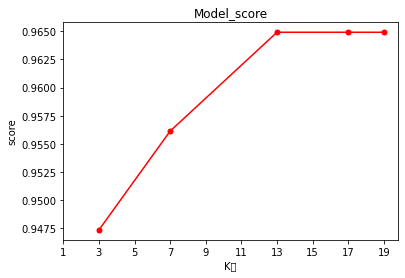

In [22]:
plt.plot(n_neighbors_num, score,color='r', label='accuracy_score',marker='.', markersize=10)#绘制折线图
plt.xticks(np.arange(1,20,2))# 设置x轴刻度
plt.title('Model_score')#设置标题
plt.xlabel('K值')#设置x轴描述
plt.ylabel('score')#设置y轴描述
plt.show()

## 五、结果分析

本实验利用的是威斯康星州的乳腺癌数据集，其数据量并不多，标签的类型为标称型，正好适合KNN算法。通过利用Sklearn中的KNN算法模块对乳腺肿瘤进行良恶性分类预测，在实验过程中首先进行了缺失值处理、标签转化、特征选择和数据标准化等数据处理操作，然后利用KNN算法对处理后的数据进行训练和测试。

本实验中参数n_neighbors（也就是理论中所述的K值）为13时KNN算法模型对样本数据预测的准确率明显要高。因为在KNN算法中，K值选择过小，得到的近邻数过少，会降低分类精度，同时也会放大噪声数据的干扰；但K值选择过大的话，会使其近似误差又会增大，此时与输入较远（不相似）的实例也会对预测起作用，使预测发生错误。在实际的应用中，K值通常是不大于20的奇数，最好是采用交叉验证的方式选择最优的K值。

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn.predict([[0.5, -1]]))

[1]


In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [24]:
distances,indices

(array([[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.41421356]]),
 array([[0, 1],
        [1, 0],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 4]]))